In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [72]:
#Downloading and Extracting the Dataset
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',#downloding from URL
    fname='jena_climate_2009_2016.csv.zip',#name of file
    extract=True)#extract the contents 
csv_path, _ = os.path.splitext(zip_path)#extracted CSV file

In [73]:
df = pd.read_csv(csv_path)#read a CSV 
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [74]:
df = df[5::6]# selects every 6th row from the DataFrame, starting from the row at index 5
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [75]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')#display the first 26 rows of the datetime format
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


<Axes: xlabel='Date Time'>

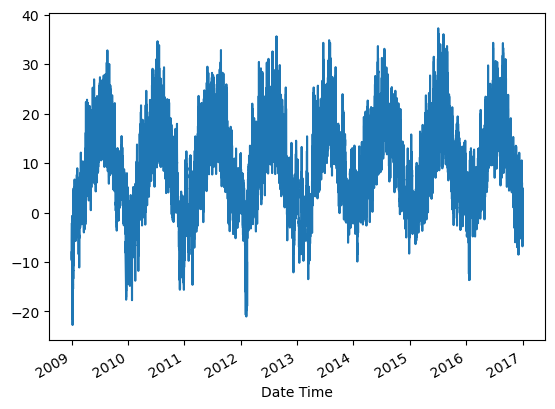

In [76]:
temp = df['T (degC)']#select a specific column from the DataFrame
temp.plot()#create a line plot 

In [77]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):#defines a function with number of previous time steps
  df_as_np = df.to_numpy()#Converts the DataFrame df into a NumPy array
  X = []#empty list that will store the input sequences
  y = []#empty list that will store the target values
  for i in range(len(df_as_np)-window_size):#Loop to Create Input Sequences and Labels
    row = [[a] for a in df_as_np[i:i+window_size]]#Create Input Features for Each Window:
    X.append(row)#Adds the created window (sequence) to the X list
    label = df_as_np[i+window_size]#Create Target Labels for Each Window
    y.append(label)#Adds this label (next data point) to the y list
  return np.array(X), np.array(y)# Converts the list X and list Y into a NumPy array

In [78]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)#Generate input-output pairs using df_to_X_y
X1.shape, y1.shape # Check the shapes of the arrays (X1 and y1)

((70086, 5, 1), (70086,))

In [79]:
#Split the Data into Training, Validation, and Test Sets
X_train1, y_train1 = X1[:60000], y1[:60000]#training data and labels with selects the first 60,000 samples from the X1,Y1 array
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]#validation data and labels with selects the next 5,000 labels from the y1,X1
X_test1, y_test1 = X1[65000:], y1[65000:]#test data and labels with selects all the remaining samples from index 65,000 to the end of the X1,Y1
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape #Check the Shapes of the Splitted Data

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()#Model Definition
model1.add(InputLayer((5, 1)))#Adds an input layer to the model with Specifies the shape
model1.add(LSTM(64))#Adds an LSTM layer with 64 units
model1.add(Dense(8, 'relu'))#Adds a fully connected layer with 8 units and ReLU activation
model1.add(Dense(1, 'linear'))#Adds a final dense layer with 1 unit and a linear activation function

model1.summary()#Displays a summary of the model architecture

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)#used to save the model during training
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])#Compiling the Model

In [82]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])#Training the Model

Epoch 1/10
1869/1875 [============================>.] - ETA: 0s - loss: 31.0623 - root_mean_squared_error: 5.5734INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 25s 11ms/step - loss: 30.9719 - root_mean_squared_error: 5.5652 - val_loss: 1.0917 - val_root_mean_squared_error: 1.0448
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 1.7621 - root_mean_squared_error: 1.3275INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 19s 10ms/step - loss: 1.7617 - root_mean_squared_error: 1.3273 - val_loss: 0.6082 - val_root_mean_squared_error: 0.7799
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.8921 - root_mean_squared_error: 0.9445INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 0.8924 - root_mean_squared_error: 0.9446 - val_loss: 0.5496 - val_root_mean_squared_error: 0.7414
Epoch 4/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.7267 - root_mean_squared_error: 0.8525INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 0.7267 - root_mean_squared_error: 0.8524 - val_loss: 0.5218 - val_root_mean_squared_error: 0.7223
Epoch 5/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.6793 - root_mean_squared_error: 0.8242INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 0.6791 - root_mean_squared_error: 0.8240 - val_loss: 0.5000 - val_root_mean_squared_error: 0.7071
Epoch 6/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.6644 - root_mean_squared_error: 0.8151INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 0.6645 - root_mean_squared_error: 0.8152 - val_loss: 0.4938 - val_root_mean_squared_error: 0.7027
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6565 - root_mean_squared_error: 0.8102 - val_loss: 0.4968 - val_root_mean_squared_error: 0.7048
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6520 - root_mean_squared_error: 0.8075 - val_loss: 0.4944 - val_root_mean_squared_error: 0.7032
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6483 - root_mean_squared_error: 0.8052 - val_loss: 0.5160 - val_root_mean_squared_error: 0.7184
Epoch 10/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6457 - root_mean_squared_error: 0.8036INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 0.6458 - root_mean_squared_error: 0.8036 - val_loss: 0.4878 - val_root_mean_squared_error: 0.6984


In [83]:
#Loading the Saved Model
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [84]:
train_predictions = model1.predict(X_train1).flatten()#Making Predictions on the Training Data
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})#Creating a DataFrame for Results
train_results #Displaying the DataFrame

1875/1875 [==============================] - 10s 5ms/step


,Train Predictions,Actuals
0,-9.813815,-9.67
1,-9.570124,-9.17
2,-8.632229,-8.10
3,-7.129507,-7.66
4,-7.084054,-7.04
...,...,...
59995,5.990815,6.07
59996,7.239703,9.88
59997,12.242669,13.53
59998,15.838144,15.43


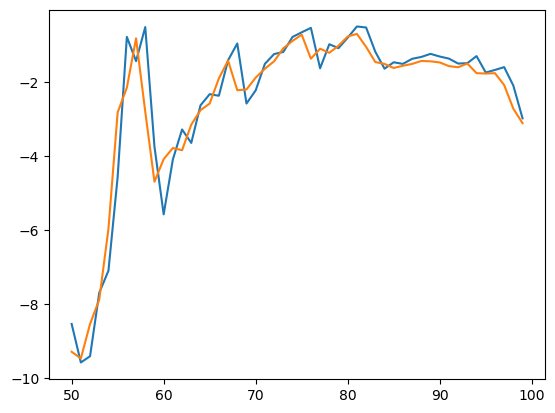

In [85]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])#Plotting the Predicted Values
plt.plot(train_results['Actuals'][50:100])#Plotting the Actual Values

In [86]:
val_predictions = model1.predict(X_val1).flatten()#Making Predictions on the Validation Data
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})#Creating a DataFrame for Validation Results
val_results #Displaying the DataFrame

157/157 [==============================] - 1s 5ms/step


,Val Predictions,Actuals
0,15.466625,14.02
1,13.295846,13.67
2,13.114360,12.27
3,11.535552,11.19
4,10.420790,10.85
...,...,...
4995,17.449690,18.27
4996,17.432846,17.85
4997,17.280895,16.65
4998,15.953874,15.85


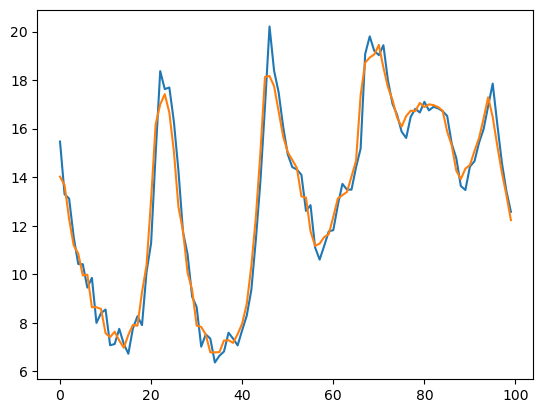

In [87]:
plt.plot(val_results['Val Predictions'][:100])#Plotting the Validation Predictions
plt.plot(val_results['Actuals'][:100])#Plotting the Actual Values

In [88]:
test_predictions = model1.predict(X_test1).flatten()#Making Predictions on the Test Data
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})#Creating a DataFrame to Compare Predictions and Actuals
test_results #Displaying the DataFrame

159/159 [==============================] - 1s 5ms/step


,Test Predictions,Actuals
0,14.471550,13.99
1,13.313955,13.46
2,12.922308,12.93
3,12.517197,12.43
4,12.071275,12.17
...,...,...
5081,-1.110886,-0.98
5082,-1.495077,-1.40
5083,-1.706615,-2.75
5084,-3.101671,-2.89


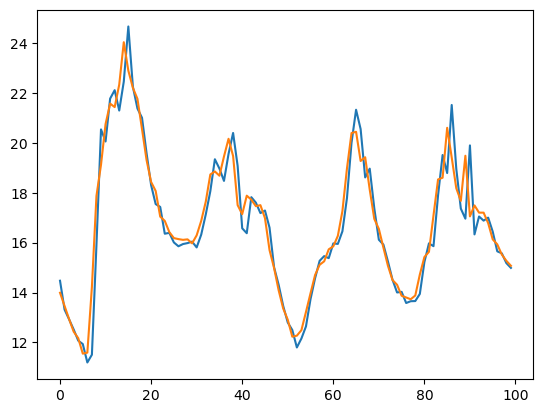

In [89]:
plt.plot(test_results['Test Predictions'][:100])#Plotting the Test Predictions
plt.plot(test_results['Actuals'][:100])#Plotting the Actual Values

In [90]:
# Split

In [91]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()#Generating Predictions
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})#Creating a DataFrame for Predictions and Actuals
  #Plotting Predictions and Actuals
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(predictions, y)#Returning the DataFrame and MSE

159/159 [==============================] - 1s 5ms/step


(      Predictions  Actuals
 0       14.471550    13.99
 1       13.313955    13.46
 2       12.922308    12.93
 3       12.517197    12.43
 4       12.071275    12.17
 ...           ...      ...
 5081    -1.110886    -0.98
 5082    -1.495077    -1.40
 5083    -1.706615    -2.75
 5084    -3.101671    -2.89
 5085    -3.016013    -3.93
 
 [5086 rows x 2 columns],
 0.6119255985877041)

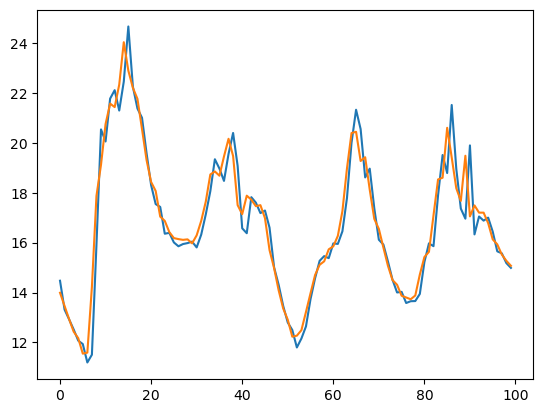

In [92]:
plot_predictions1(model1, X_test1, y_test1)#Calling the plot_predictions1() Function

In [93]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2, activation='relu'))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 8)                 2056      
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [95]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1871/1875 [============================>.] - ETA: 0s - loss: 21.8930 - root_mean_squared_error: 4.6790INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 21.8497 - root_mean_squared_error: 4.6744 - val_loss: 1.3035 - val_root_mean_squared_error: 1.1417
Epoch 2/10
1866/1875 [============================>.] - ETA: 0s - loss: 1.2873 - root_mean_squared_error: 1.1346INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 1.2860 - root_mean_squared_error: 1.1340 - val_loss: 0.8103 - val_root_mean_squared_error: 0.9002
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.9156 - root_mean_squared_error: 0.9569INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.9156 - root_mean_squared_error: 0.9569 - val_loss: 0.6227 - val_root_mean_squared_error: 0.7891
Epoch 4/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.7509 - root_mean_squared_error: 0.8666INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.7509 - root_mean_squared_error: 0.8666 - val_loss: 0.5283 - val_root_mean_squared_error: 0.7269
Epoch 5/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.6973 - root_mean_squared_error: 0.8350INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6978 - root_mean_squared_error: 0.8353 - val_loss: 0.5115 - val_root_mean_squared_error: 0.7152
Epoch 6/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.6816 - root_mean_squared_error: 0.8256INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6817 - root_mean_squared_error: 0.8257 - val_loss: 0.5006 - val_root_mean_squared_error: 0.7076
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6726 - root_mean_squared_error: 0.8201 - val_loss: 0.5069 - val_root_mean_squared_error: 0.7120
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.6671 - root_mean_squared_error: 0.8167INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.6671 - root_mean_squared_error: 0.8167 - val_loss: 0.4943 - val_root_mean_squared_error: 0.7031
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6645 - root_mean_squared_error: 0.8152 - val_loss: 0.4970 - val_root_mean_squared_error: 0.7050
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6595 - root_mean_squared_error: 0.8121 - val_loss: 0.4998 - val_root_mean_squared_error: 0.7070


159/159 [==============================] - 1s 4ms/step


(      Predictions  Actuals
 0       14.113940    13.99
 1       12.996449    13.46
 2       12.678542    12.93
 3       12.237118    12.43
 4       11.824786    12.17
 ...           ...      ...
 5081    -1.410150    -0.98
 5082    -1.596182    -1.40
 5083    -1.794822    -2.75
 5084    -3.289048    -2.89
 5085    -3.258494    -3.93
 
 [5086 rows x 2 columns],
 0.7123071077036697)

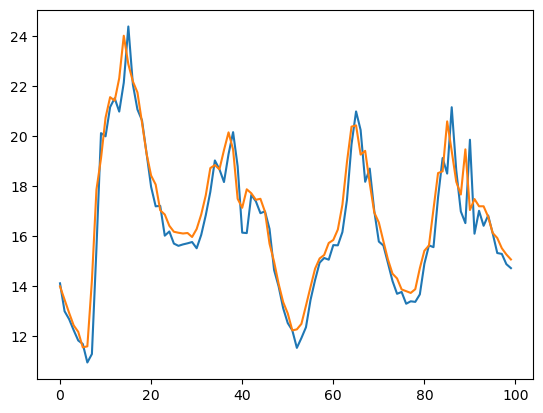

In [96]:
plot_predictions1(model2, X_test1, y_test1)

In [97]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                12864     
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [99]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1868/1875 [============================>.] - ETA: 0s - loss: 22.4710 - root_mean_squared_error: 4.7404INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 23s 10ms/step - loss: 22.3942 - root_mean_squared_error: 4.7323 - val_loss: 0.8897 - val_root_mean_squared_error: 0.9432
Epoch 2/10
1870/1875 [============================>.] - ETA: 0s - loss: 1.4748 - root_mean_squared_error: 1.2144INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 20s 10ms/step - loss: 1.4726 - root_mean_squared_error: 1.2135 - val_loss: 0.5778 - val_root_mean_squared_error: 0.7601
Epoch 3/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.8277 - root_mean_squared_error: 0.9098INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 0.8268 - root_mean_squared_error: 0.9093 - val_loss: 0.5210 - val_root_mean_squared_error: 0.7218
Epoch 4/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6927 - root_mean_squared_error: 0.8323INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 0.6928 - root_mean_squared_error: 0.8324 - val_loss: 0.5010 - val_root_mean_squared_error: 0.7078
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6609 - root_mean_squared_error: 0.8130 - val_loss: 0.5100 - val_root_mean_squared_error: 0.7141
Epoch 6/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6504 - root_mean_squared_error: 0.8065INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 0.6508 - root_mean_squared_error: 0.8067 - val_loss: 0.4892 - val_root_mean_squared_error: 0.6994
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6446 - root_mean_squared_error: 0.8029 - val_loss: 0.4952 - val_root_mean_squared_error: 0.7037
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6410 - root_mean_squared_error: 0.8006 - val_loss: 0.5089 - val_root_mean_squared_error: 0.7134
Epoch 9/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.6389 - root_mean_squared_error: 0.7993INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 19s 10ms/step - loss: 0.6389 - root_mean_squared_error: 0.7993 - val_loss: 0.4879 - val_root_mean_squared_error: 0.6985
Epoch 10/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.6379 - root_mean_squared_error: 0.7987INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


1875/1875 [==============================] - 20s 11ms/step - loss: 0.6381 - root_mean_squared_error: 0.7988 - val_loss: 0.4855 - val_root_mean_squared_error: 0.6968


In [100]:
temp

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
                       ... 
2016-12-31 19:10:00   -0.98
2016-12-31 20:10:00   -1.40
2016-12-31 21:10:00   -2.75
2016-12-31 22:10:00   -2.89
2016-12-31 23:10:00   -3.93
Name: T (degC), Length: 70091, dtype: float64

In [101]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [102]:
day = 24*60*60
year = (365.2425)*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


In [103]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.008334,0.999965


In [104]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [105]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [106]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [107]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [108]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [109]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                17920     
                                                                 
 dense_20 (Dense)            (None, 8)                 520       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [111]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 57.7637 - root_mean_squared_error: 7.6002INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 26s 12ms/step - loss: 57.7388 - root_mean_squared_error: 7.5986 - val_loss: 4.5458 - val_root_mean_squared_error: 2.1321
Epoch 2/10
1873/1875 [============================>.] - ETA: 0s - loss: 5.6711 - root_mean_squared_error: 2.3814INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 22s 12ms/step - loss: 5.6677 - root_mean_squared_error: 2.3807 - val_loss: 1.7603 - val_root_mean_squared_error: 1.3268
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 1.9873 - root_mean_squared_error: 1.4097INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 1.9860 - root_mean_squared_error: 1.4092 - val_loss: 1.0426 - val_root_mean_squared_error: 1.0211
Epoch 4/10
1873/1875 [============================>.] - ETA: 0s - loss: 1.2727 - root_mean_squared_error: 1.1281INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 21s 11ms/step - loss: 1.2724 - root_mean_squared_error: 1.1280 - val_loss: 0.8239 - val_root_mean_squared_error: 0.9077
Epoch 5/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.9752 - root_mean_squared_error: 0.9875INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.9745 - root_mean_squared_error: 0.9872 - val_loss: 0.6603 - val_root_mean_squared_error: 0.8126
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.7750 - root_mean_squared_error: 0.8803INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.7751 - root_mean_squared_error: 0.8804 - val_loss: 0.5541 - val_root_mean_squared_error: 0.7443
Epoch 7/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.6382 - root_mean_squared_error: 0.7989INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.6380 - root_mean_squared_error: 0.7987 - val_loss: 0.4539 - val_root_mean_squared_error: 0.6737
Epoch 8/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.5679 - root_mean_squared_error: 0.7536INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 22s 11ms/step - loss: 0.5679 - root_mean_squared_error: 0.7536 - val_loss: 0.4261 - val_root_mean_squared_error: 0.6528
Epoch 9/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.5412 - root_mean_squared_error: 0.7356INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.5408 - root_mean_squared_error: 0.7354 - val_loss: 0.4156 - val_root_mean_squared_error: 0.6446
Epoch 10/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.5303 - root_mean_squared_error: 0.7283INFO:tensorflow:Assets written to: model4\assets


INFO:tensorflow:Assets written to: model4\assets


1875/1875 [==============================] - 22s 12ms/step - loss: 0.5308 - root_mean_squared_error: 0.7286 - val_loss: 0.4098 - val_root_mean_squared_error: 0.6402


159/159 [==============================] - 2s 5ms/step


(      Predictions  Actuals
 0       13.311637    13.46
 1       12.901159    12.93
 2       12.475226    12.43
 3       12.173822    12.17
 4       12.290567    11.55
 ...           ...      ...
 5080    -0.940275    -0.98
 5081    -1.255963    -1.40
 5082    -1.550331    -2.75
 5083    -2.965939    -2.89
 5084    -2.972745    -3.93
 
 [5085 rows x 2 columns],
 0.486218893308658)

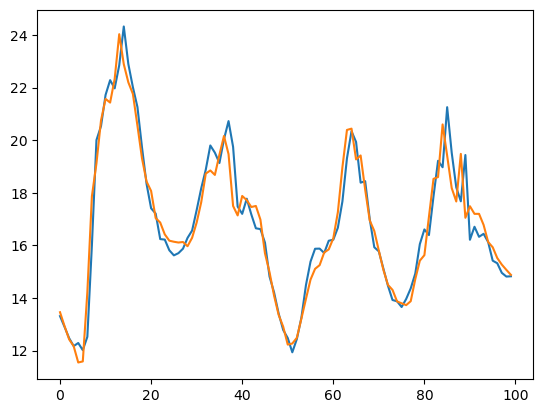

In [112]:
plot_predictions1(model4, X2_test, y2_test)

In [113]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,1001.40,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,1001.19,-2.75,-0.675590,0.737277,0.008334,0.999965


In [114]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [115]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [116]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [117]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3
  return X

def preprocess_output(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [118]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

array([[[-1.07355644e+00,  1.04009390e+00, -9.65925826e-01,
          2.58819045e-01,  5.22877889e-01, -8.52407598e-01],
        [-1.00807435e+00,  9.90728707e-01, -8.66025404e-01,
          5.00000000e-01,  5.22266764e-01, -8.52782169e-01],
        [-9.51080673e-01,  8.49685305e-01, -7.07106781e-01,
          7.07106781e-01,  5.21655371e-01, -8.53156301e-01],
        ...,
        [-8.80748054e-01,  6.66328883e-01, -2.58819045e-01,
          9.65925826e-01,  5.20431780e-01, -8.53903251e-01],
        [-8.29817537e-01,  5.37039098e-01, -7.16474371e-12,
          1.00000000e+00,  5.19819584e-01, -8.54276068e-01],
        [-8.01927015e-01,  4.74744929e-01,  2.58819045e-01,
          9.65925826e-01,  5.19207120e-01, -8.54648446e-01]],

       [[-1.00807435e+00,  9.90728707e-01, -8.66025404e-01,
          5.00000000e-01,  5.22266764e-01, -8.52782169e-01],
        [-9.51080673e-01,  8.49685305e-01, -7.07106781e-01,
          7.07106781e-01,  5.21655371e-01, -8.53156301e-01],
        [-9.14701

In [119]:
preprocess_output(y3_train)
preprocess_output(y3_val)
preprocess_output(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [120]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 64)                18176     
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
 dense_23 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [122]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.1549 - root_mean_squared_error: 0.3935INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 28s 13ms/step - loss: 0.1546 - root_mean_squared_error: 0.3932 - val_loss: 0.0342 - val_root_mean_squared_error: 0.1849
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0257 - root_mean_squared_error: 0.1602INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.0257 - root_mean_squared_error: 0.1602 - val_loss: 0.0190 - val_root_mean_squared_error: 0.1380
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0136 - root_mean_squared_error: 0.1166INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 0.0136 - root_mean_squared_error: 0.1166 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0986
Epoch 4/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0090 - root_mean_squared_error: 0.0950INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.0090 - root_mean_squared_error: 0.0950 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0833
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0074 - root_mean_squared_error: 0.0861INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 0.0074 - root_mean_squared_error: 0.0861 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0759
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0063 - root_mean_squared_error: 0.0796INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 0.0063 - root_mean_squared_error: 0.0796 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 7/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0748INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 24s 13ms/step - loss: 0.0056 - root_mean_squared_error: 0.0748 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0645
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0053 - root_mean_squared_error: 0.0725 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0647
Epoch 9/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0051 - root_mean_squared_error: 0.0713INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 23s 12ms/step - loss: 0.0051 - root_mean_squared_error: 0.0713 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0617
Epoch 10/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0050 - root_mean_squared_error: 0.0706INFO:tensorflow:Assets written to: model5\assets


INFO:tensorflow:Assets written to: model5\assets


1875/1875 [==============================] - 25s 13ms/step - loss: 0.0050 - root_mean_squared_error: 0.0707 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0612


In [123]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df

159/159 [==============================] - 2s 6ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.388685,0.412451,-0.788990,-0.793439
1,0.345850,0.353683,-0.776443,-0.763123
2,0.308735,0.323123,-0.742134,-0.721893
3,0.315199,0.250251,-0.689081,-0.652773
4,0.272594,0.254952,-0.600938,-0.652773
...,...,...,...,...
5079,-1.280792,-1.222477,1.603437,1.601508
5080,-1.310681,-1.271843,1.583573,1.506923
5081,-1.307938,-1.430516,1.480059,1.481458
5082,-1.484054,-1.446971,1.430333,1.415976


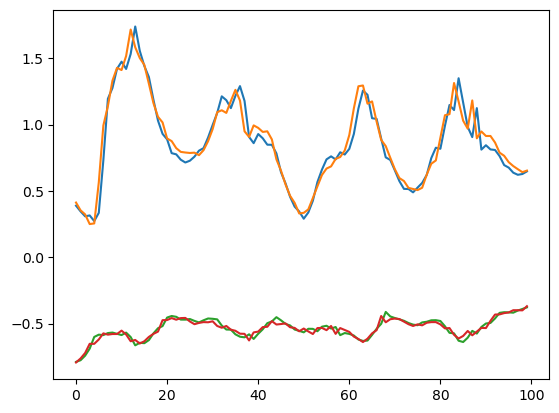

In [124]:
plot_predictions2(model5, X3_test, y3_test)

In [125]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [126]:
def get_predictions_postprocessed(model, X, y):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  return df

In [127]:
post_processed_df = get_predictions_postprocessed(model5, X3_test, y3_test)
post_processed_df

159/159 [==============================] - 1s 6ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.727804,12.93,982.466736,982.43
1,12.363364,12.43,982.570190,982.68
2,12.047582,12.17,982.853088,983.02
3,12.102580,11.55,983.290588,983.59
4,11.740094,11.59,984.017517,983.59
...,...,...,...,...
5079,-1.476144,-0.98,1002.195923,1002.18
5080,-1.730434,-1.40,1002.032104,1001.40
5081,-1.707103,-2.75,1001.178467,1001.19
5082,-3.205502,-2.89,1000.768433,1000.65


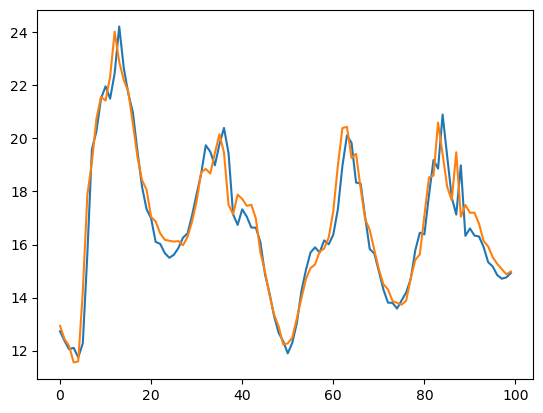

In [128]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

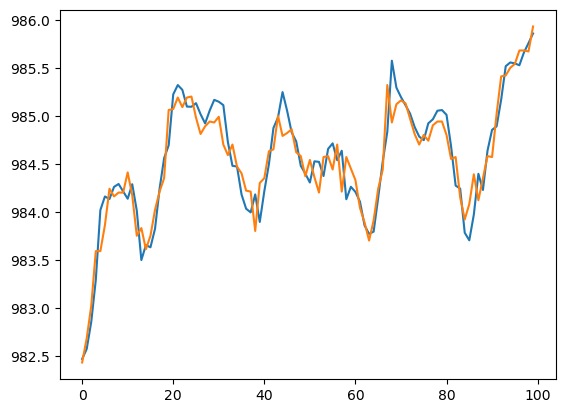

In [129]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [130]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(16))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_9 (LSTM)               (None, 16)                3136      
                                                                 
 dense_24 (Dense)            (None, 8)                 136       
                                                                 
 dense_25 (Dense)            (None, 2)                 18        
                                                                 
Total params: 8282 (32.35 KB)
Trainable params: 8282 (32.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [131]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [132]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.2157 - root_mean_squared_error: 0.4644INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 39s 18ms/step - loss: 0.2156 - root_mean_squared_error: 0.4643 - val_loss: 0.0549 - val_root_mean_squared_error: 0.2343
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0443 - root_mean_squared_error: 0.2104INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 32s 17ms/step - loss: 0.0443 - root_mean_squared_error: 0.2104 - val_loss: 0.0361 - val_root_mean_squared_error: 0.1899
Epoch 3/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0297 - root_mean_squared_error: 0.1723INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 31s 17ms/step - loss: 0.0297 - root_mean_squared_error: 0.1722 - val_loss: 0.0235 - val_root_mean_squared_error: 0.1534
Epoch 4/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0184 - root_mean_squared_error: 0.1356INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 32s 17ms/step - loss: 0.0184 - root_mean_squared_error: 0.1356 - val_loss: 0.0138 - val_root_mean_squared_error: 0.1176
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1124INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 32s 17ms/step - loss: 0.0126 - root_mean_squared_error: 0.1124 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1011
Epoch 6/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0100 - root_mean_squared_error: 0.0999INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 32s 17ms/step - loss: 0.0100 - root_mean_squared_error: 0.0999 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0893
Epoch 7/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0083 - root_mean_squared_error: 0.0913INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 31s 17ms/step - loss: 0.0083 - root_mean_squared_error: 0.0913 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0818
Epoch 8/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0072 - root_mean_squared_error: 0.0846INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 31s 17ms/step - loss: 0.0072 - root_mean_squared_error: 0.0846 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0751
Epoch 9/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.0064 - root_mean_squared_error: 0.0797INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 41s 22ms/step - loss: 0.0064 - root_mean_squared_error: 0.0797 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0709
Epoch 10/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0763INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 37s 20ms/step - loss: 0.0058 - root_mean_squared_error: 0.0763 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0676


In [133]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_3 (Flatten)         (None, 384)               0         
                                                                 
 dense_26 (Dense)            (None, 8)                 3080      
                                                                 
 dense_27 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3930 (15.35 KB)
Trainable params: 3930 (15.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [134]:
cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [135]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.1148 - root_mean_squared_error: 0.3388INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 14s 7ms/step - loss: 0.1144 - root_mean_squared_error: 0.3382 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1491
Epoch 2/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0165 - root_mean_squared_error: 0.1283INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 12s 6ms/step - loss: 0.0164 - root_mean_squared_error: 0.1282 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1044
Epoch 3/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0094 - root_mean_squared_error: 0.0971INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0095 - root_mean_squared_error: 0.0975 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0843
Epoch 4/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0073 - root_mean_squared_error: 0.0854INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0073 - root_mean_squared_error: 0.0854 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0758
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0066 - root_mean_squared_error: 0.0809INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0065 - root_mean_squared_error: 0.0809 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0717
Epoch 6/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0062 - root_mean_squared_error: 0.0787INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0062 - root_mean_squared_error: 0.0787 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0698
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0772 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0701
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0058 - root_mean_squared_error: 0.0762INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0058 - root_mean_squared_error: 0.0762 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 9/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.0057 - root_mean_squared_error: 0.0753INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0057 - root_mean_squared_error: 0.0753 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0677
Epoch 10/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0056 - root_mean_squared_error: 0.0748INFO:tensorflow:Assets written to: model6\assets


INFO:tensorflow:Assets written to: model6\assets


1875/1875 [==============================] - 11s 6ms/step - loss: 0.0056 - root_mean_squared_error: 0.0748 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0660
